In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [11]:
data = pd.read_csv('google_review_ratings.csv')
data.head()
print(data.shape)
data.isna().sum()
X = data.drop(columns=['User', 'Category 11'])
# X['Category 11'].drop(col)
data

(5456, 26)


User  Category 1  Category 2  Category 3  Category 4  Category 5  \
0        User 1        0.00        0.00        3.63        3.65        5.00   
1        User 2        0.00        0.00        3.63        3.65        5.00   
2        User 3        0.00        0.00        3.63        3.63        5.00   
3        User 4        0.00        0.50        3.63        3.63        5.00   
4        User 5        0.00        0.00        3.63        3.63        5.00   
...         ...         ...         ...         ...         ...         ...   
5451  User 5452        0.91        5.00        4.00        2.79        2.77   
5452  User 5453        0.93        5.00        4.02        2.79        2.78   
5453  User 5454        0.94        5.00        4.03        2.80        2.78   
5454  User 5455        0.95        4.05        4.05        2.81        2.79   
5455  User 5456        0.95        4.07        5.00        2.82        2.80   

      Category 6  Category 7  Category 8  Category 9  ...  Category 16  \
0           2.92        5.00        2.35        2.33  ...         0.59   
1           2.92        5.00        2.64        2.33  ...         0.59   
2           2.92        5.00        2.64        2.33  ...         0.59   
3           2.92        5.00        2.35        2.33  ...         0.59   
4           2.92        5.00        2.64        2.33  ...         0.59   
...          ...         ...         ...         ...  ...          ...   
5451        2.57        2.43        1.09        1.77  ...         0.66   
5452        2.57        1.77        1.07        1.76  ...         0.65   
5453        2.57        1.75        1.05        1.75  ...         0.65   
5454        2.44        1.76        1.03        1.74  ...         0.64   
5455        2.57        2.42        1.02        1.74  ...         0.64   

     Category 17  Category 18  Category 19  Category 20  Category 21  \
0           0.50         0.00         0.50         0.00         0.00   
1           0.50         0.00         0.50         0.00         0.00   
2           0.50         0.00         0.50         0.00         0.00   
3           0.50         0.00         0.50         0.00         0.00   
4           0.50         0.00         0.50         0.00         0.00   
...          ...          ...          ...          ...          ...   
5451        0.65         0.66         0.69         5.00         1.05   
5452        0.64         0.65         1.59         1.62         1.06   
5453        0.63         0.64         0.74         5.00         1.07   
5454        0.63         0.64         0.75         5.00         1.08   
5455        0.62         0.63         0.78         5.00         1.08   

      Category 22  Category 23  Category 24  Unnamed: 25  
0             0.0          0.0         0.00          NaN  
1             0.0          0.0         0.00          NaN  
2             0.0          0.0         0.00          NaN  
3             0.0          0.0         0.00          NaN  
4             0.0          0.0         0.00          NaN  
...           ...          ...          ...          ...  
5451          5.0          5.0         1.56          NaN  
5452          5.0          5.0         1.09          NaN  
5453          5.0          5.0         1.11          NaN  
5454          5.0          5.0         1.12          NaN  
5455          5.0          5.0         1.17          NaN  

[5456 rows x 26 columns]

In [13]:
X.dtypes

Category 1     float64
Category 2     float64
Category 3     float64
Category 4     float64
Category 5     float64
Category 6     float64
Category 7     float64
Category 8     float64
Category 9     float64
Category 10    float64
Category 12    float64
Category 13    float64
Category 14    float64
Category 15    float64
Category 16    float64
Category 17    float64
Category 18    float64
Category 19    float64
Category 20    float64
Category 21    float64
Category 22    float64
Category 23    float64
Category 24    float64
Unnamed: 25    float64
dtype: object

In [6]:
## Dropping Unnamed 25 Column, Error Column.
data = data.drop(columns=['Unnamed: 25'])

In [20]:
missing_values = X.isnull().sum()
X.fillna(X.mean(), inplace=True)

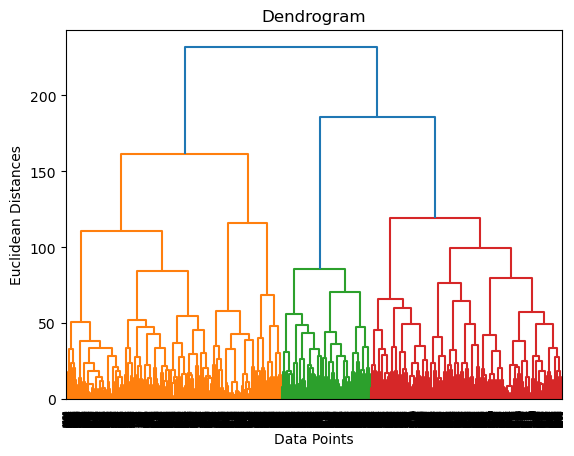

In [21]:
import scipy.cluster.hierarchy as sch
# Perform hierarchical clustering
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

# Display the dendrogram
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distances')
plt.title('Dendrogram')
plt.show()

<Axes: xlabel='Category 21', ylabel='Category 24'>

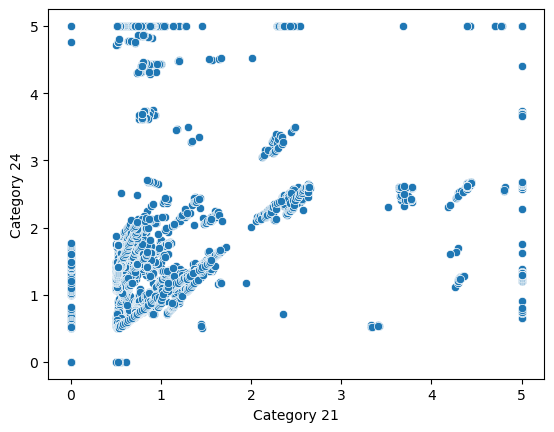

In [10]:
sns.scatterplot(x='Category 21', y='Category 24', data=data)

In [22]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

In [39]:

y_hc = pd.DataFrame(y_hc)
y_hc.value_counts()

1    1609
3    1445
2     978
0     772
4     652
dtype: int64

In [40]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

InvalidIndexError: (          0
0     False
1     False
2     False
3     False
4     False
...     ...
5451  False
5452  False
5453  False
5454  False
5455  False

[5456 rows x 1 columns], 0)